# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Nur Fadillah]
- **Email:** [nurfadillah31082@gmail.com]
- **ID Dicoding:** [nur-fadillah31]

# 1. Pertanyaan Bisnis

*   Bagaimana pola penggunaan layanan bike sharing berubah sepanjang tahun, bulan, dan jam?
*   Apakah ada perbedaan penggunaan layanan bike sharing pada hari libur?
* Apakah ada perbedaan penggunaan layanan bike sharing pada hari kerja?
* Bagaimana cuaca memengaruhi penggunaan layanan bike sharing?




# 2. Packages/Library yang Digunakan

In [1]:
import os
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# 3. Data Wrangling

In [4]:
!gdown 1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ

Downloading...
From: https://drive.google.com/uc?id=1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ
To: /content/Bike-sharing-dataset.zip
100% 280k/280k [00:00<00:00, 23.8MB/s]


In [5]:

local_zip = 'Bike-sharing-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('bike-sharing-dataset')
zip_ref.close()


In [6]:

base_dir = 'bike-sharing-dataset/'
print(os.listdir(base_dir))

['hour.csv', 'day.csv', 'Readme.txt']


# Gathering Data
Melihat isi dataset day.csv dalam bentuk DataFrame.

In [30]:
df_day = pd.read_csv(base_dir + 'day.csv')
df_day


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


Melihat isi dataset hour.csv dalam bentuk DataFrame.

In [8]:
df_hour = pd.read_csv(base_dir + 'hour.csv')
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


# Assessing Data

In [31]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [10]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
print('Jumlah data df_day yang terdapat missing value')
print(df_day.isnull().sum())
print()
print('Jumlah data df_hour yang terdapat missing value')
print(df_hour.isnull().sum())

Jumlah data df_day yang terdapat missing value
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah data df_hour yang terdapat missing value
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [12]:
print(f'Jumlah data df_day duplikat  : {df_day.duplicated().sum()}')
print(f'Jumlah data df_hour duplikat : {df_hour.duplicated().sum()}')

Jumlah data df_day duplikat  : 0
Jumlah data df_hour duplikat : 0


In [13]:
df_day.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [14]:
df_hour.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


# Data Cleaning

In [15]:
df_day.dteday = pd.to_datetime(df_day.dteday)
df_hour.dteday = pd.to_datetime(df_hour.dteday)

In [16]:

df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-


# 4. Exploratory Data Analysis (EDA)

> Melihat isi dataset dalam bentuk DataFrame.


In [17]:
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [18]:
f = open(base_dir + 'Readme.txt', 'r')

print(f.read())


Bike Sharing Dataset

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


Background 

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of tra

# Label and Ordinal Decoding

In [32]:
df_day.replace({
    'season': {1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'},
    'yr': {0: 2011, 1: 2012},
    'holiday': {0: 'Not Holiday', 1: 'Holiday'},
    'workingday': {0: 'Holiday', 1: 'Working Day'},
    'weekday': {
        0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
    },
    'weathersit': {
        1: 'Clear', 2: 'Mist + Cloudy', 3: 'Light Snow', 4: 'Heavy Rain'
    }
}, inplace=True)

df_hour.replace({
    'season': {1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'},
    'yr': {0: 2011, 1: 2012},
    'holiday': {0: 'Holiday', 1: 'Not Holiday'},
    'workingday': {0: 'Holiday', 1: 'Working Day'},
    'weekday': {
        0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
    },
    'weathersit': {
        1: 'Clear', 2: 'Mist + Cloudy', 3: 'Light Snow', 4: 'Heavy Rain'
    }
}, inplace=True)


In [33]:
print('df_day Unique Value')
print(f'season     : {df_day.season.unique()}')
print(f'yr         : {df_day.yr.unique()}')
print(f'holiday    : {df_day.holiday.unique()}')
print(f'workingday : {df_day.workingday.unique()}')
print(f'weekday    : {df_day.weekday.unique()}')
print(f'weathersit : {df_day.weathersit.unique()}\n')

print('df_hour Unique Value')
print(f'season     : {df_hour.season.unique()}')
print(f'yr         : {df_hour.yr.unique()}')
print(f'holiday    : {df_hour.holiday.unique()}')
print(f'workingday : {df_hour.workingday.unique()}')
print(f'weekday    : {df_hour.weekday.unique()}')
print(f'weathersit : {df_hour.weathersit.unique()}')

df_day Unique Value
season     : ['Springer' 'Summer' 'Fall' 'Winter']
yr         : [2011 2012]
holiday    : ['Not Holiday' 'Holiday']
workingday : ['Holiday' 'Working Day']
weekday    : ['Sat' 'Sun' 'Mon' 'Tue' 'Wed' 'Thu' 'Fri']
weathersit : ['Mist + Cloudy' 'Clear' 'Light Snow']

df_hour Unique Value
season     : ['Springer' 'Summer' 'Fall' 'Winter']
yr         : [2011 2012]
holiday    : ['Holiday' 'Not Holiday']
workingday : ['Holiday' 'Working Day']
weekday    : ['Sat' 'Sun' 'Mon' 'Tue' 'Wed' 'Thu' 'Fri']
weathersit : ['Clear' 'Mist + Cloudy' 'Light Snow' 'Heavy Rain']


# Denormalize Numeric Value

In [34]:
df_day.temp = df_day.temp.multiply(41)
df_day.atemp = df_day.atemp.multiply(50)
df_day.hum = df_day.hum.multiply(100)
df_day.windspeed = df_day.windspeed.multiply(67)

df_hour.temp = df_hour.temp.multiply(41)
df_hour.atemp = df_hour.atemp.multiply(50)
df_hour.hum = df_hour.hum.multiply(100)
df_hour.windspeed = df_hour.windspeed.multiply(67)

In [35]:
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,1,Not Holiday,Sat,Holiday,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Springer,2011,1,Not Holiday,Sun,Holiday,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Springer,2011,1,Not Holiday,Mon,Working Day,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Springer,2011,1,Not Holiday,Tue,Working Day,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Springer,2011,1,Not Holiday,Wed,Working Day,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Springer,2012,12,Not Holiday,Thu,Working Day,Mist + Cloudy,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,728,2012-12-28,Springer,2012,12,Not Holiday,Fri,Working Day,Mist + Cloudy,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,729,2012-12-29,Springer,2012,12,Not Holiday,Sat,Holiday,Mist + Cloudy,10.386653,12.12000,75.2917,8.333661,159,1182,1341
729,730,2012-12-30,Springer,2012,12,Not Holiday,Sun,Holiday,Clear,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [36]:
df_day.describe()

,instant,yr,mnth,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2011.500684,6.519836,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,3.451913,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,1.000000,2011.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011.000000,4.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012.000000,7.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012.000000,10.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012.000000,12.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [37]:
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,1,0,Holiday,Sat,Holiday,Clear,9.84,14.395,81.0,0.0000,3,13,16
1,2,2011-01-01,Springer,2011,1,1,Holiday,Sat,Holiday,Clear,9.02,13.635,80.0,0.0000,8,32,40
2,3,2011-01-01,Springer,2011,1,2,Holiday,Sat,Holiday,Clear,9.02,13.635,80.0,0.0000,5,27,32
3,4,2011-01-01,Springer,2011,1,3,Holiday,Sat,Holiday,Clear,9.84,14.395,75.0,0.0000,3,10,13
4,5,2011-01-01,Springer,2011,1,4,Holiday,Sat,Holiday,Clear,9.84,14.395,75.0,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Springer,2012,12,19,Holiday,Mon,Working Day,Mist + Cloudy,10.66,12.880,60.0,11.0014,11,108,119
17375,17376,2012-12-31,Springer,2012,12,20,Holiday,Mon,Working Day,Mist + Cloudy,10.66,12.880,60.0,11.0014,8,81,89
17376,17377,2012-12-31,Springer,2012,12,21,Holiday,Mon,Working Day,Clear,10.66,12.880,60.0,11.0014,7,83,90
17377,17378,2012-12-31,Springer,2012,12,22,Holiday,Mon,Working Day,Clear,10.66,13.635,56.0,8.9981,13,48,61


In [38]:
df_hour.describe()

,instant,dteday,yr,mnth,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2011.502561,6.537775,11.546752,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,2011.000000,1.000000,0.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2011.000000,4.000000,6.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,2012.000000,7.000000,12.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,2012.000000,10.000000,18.000000,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,2012.000000,12.000000,23.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000
std,5017.0295,NaN,0.500008,3.438776,6.914405,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599


# Data Disribution

In [39]:
print('df_day Data Distribution\n')
print(f'{df_day.season.value_counts().sort_index()}\n')
print(f'{df_day.yr.value_counts().sort_index()}\n')
print(f'{df_day.mnth.value_counts().sort_index()}\n')
print(f'{df_day.holiday.value_counts().sort_index()}\n')
print(f'{df_day.workingday.value_counts().sort_index()}\n')
print(f'{df_day.weekday.value_counts().sort_index()}\n')
print(f'{df_day.weathersit.value_counts().sort_index()}\n')

df_day Data Distribution

season
Fall        188
Springer    181
Summer      184
Winter      178
Name: count, dtype: int64

yr
2011    365
2012    366
Name: count, dtype: int64

mnth
1     62
2     57
3     62
4     60
5     62
6     60
7     62
8     62
9     60
10    62
11    60
12    62
Name: count, dtype: int64

holiday
Holiday         21
Not Holiday    710
Name: count, dtype: int64

workingday
Holiday        231
Working Day    500
Name: count, dtype: int64

weekday
Fri    104
Mon    105
Sat    105
Sun    105
Thu    104
Tue    104
Wed    104
Name: count, dtype: int64

weathersit
Clear            463
Light Snow        21
Mist + Cloudy    247
Name: count, dtype: int64



In [40]:
print('df_hour Data Distribution\n')
print(f'{df_hour.season.value_counts().sort_index()}\n')
print(f'{df_hour.yr.value_counts().sort_index()}\n')
print(f'{df_hour.mnth.value_counts().sort_index()}\n')
print(f'{df_hour.holiday.value_counts().sort_index()}\n')
print(f'{df_hour.workingday.value_counts().sort_index()}\n')
print(f'{df_hour.weekday.value_counts().sort_index()}\n')
print(f'{df_hour.weathersit.value_counts().sort_index()}\n')

df_hour Data Distribution

season
Fall        4496
Springer    4242
Summer      4409
Winter      4232
Name: count, dtype: int64

yr
2011    8645
2012    8734
Name: count, dtype: int64

mnth
1     1429
2     1341
3     1473
4     1437
5     1488
6     1440
7     1488
8     1475
9     1437
10    1451
11    1437
12    1483
Name: count, dtype: int64

holiday
Holiday        16879
Not Holiday      500
Name: count, dtype: int64

workingday
Holiday         5514
Working Day    11865
Name: count, dtype: int64

weekday
Fri    2487
Mon    2479
Sat    2512
Sun    2502
Thu    2471
Tue    2453
Wed    2475
Name: count, dtype: int64

weathersit
Clear            11413
Heavy Rain           3
Light Snow        1419
Mist + Cloudy     4544
Name: count, dtype: int64



# 5. Explanatory Data Analysis

# 5.1 Penggunaan Layanan Bike Sharing Sepanjang Tahun, Bulan, dan Jam

Tahun

In [19]:
#Tahun
df_year = df_day.groupby('yr').instant.nunique().reset_index()
df_year.rename(columns={'instant': 'sum'}, inplace=True)
df_year

,yr,sum
0,0,365
1,1,366


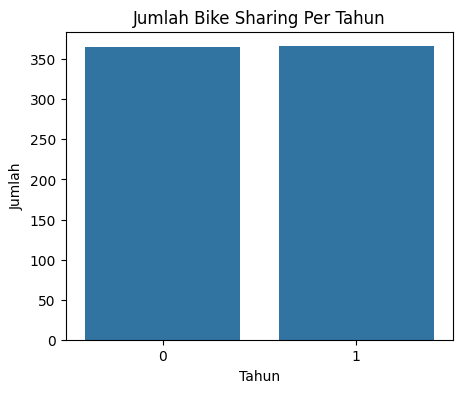

In [20]:

plt.figure(figsize=(5, 4))
sns.barplot(
    data=df_year.sort_values('yr', ascending=False),
    x='yr',
    y='sum',
)

plt.title('Jumlah Bike Sharing Per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.show()

4.1.2 Bulan

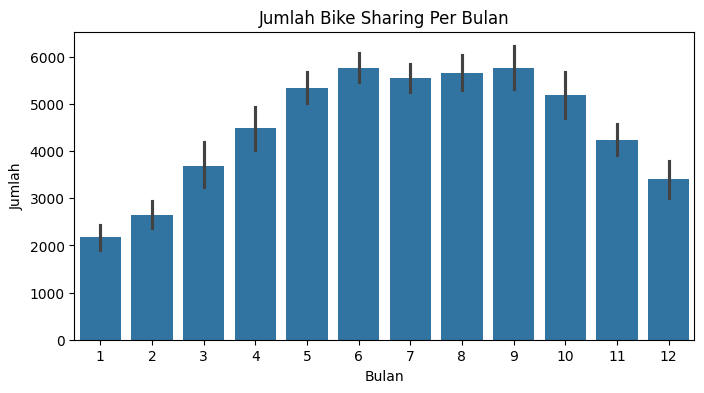

In [21]:

plt.figure(figsize=(8, 4))
sns.barplot(
    data=df_day.sort_values('mnth', ascending=False),
    x='mnth',
    y='cnt',
)

plt.title('Jumlah Bike Sharing Per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.show()


In [ ]:
4.1.3 Jam

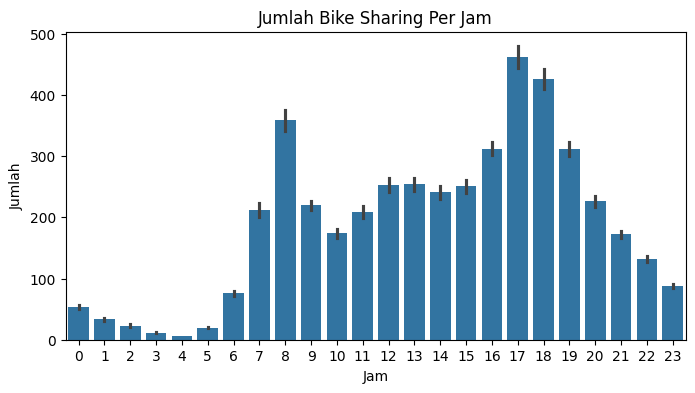

In [22]:
plt.figure(figsize=(8, 4))
sns.barplot(
    data=df_hour.sort_values('hr', ascending=False),
    x='hr',
    y='cnt',
)

plt.title('Jumlah Bike Sharing Per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah')
plt.show()

# 5.2 Pengaruh hari libur terhadap penggunaan layanan Bike Sharing

In [23]:
df_holiday = df_day.groupby('holiday').instant.nunique().reset_index()
df_holiday.rename(columns={'instant': 'sum'}, inplace=True)
df_holiday

,holiday,sum
0,0,710
1,1,21


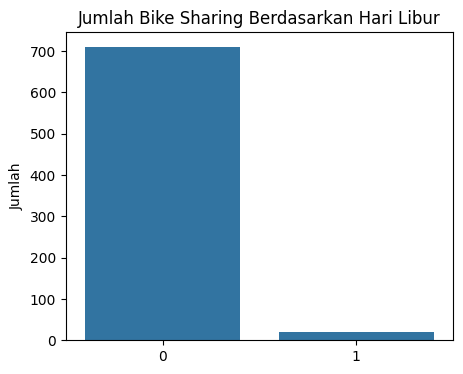

In [24]:
plt.figure(figsize=(5, 4))
sns.barplot(
    data=df_holiday.sort_values('holiday', ascending=False),
    x='holiday',
    y='sum',
)

plt.title('Jumlah Bike Sharing Berdasarkan Hari Libur')
plt.xlabel(None)
plt.ylabel('Jumlah')
plt.show()


# 4.3 Pengaruh hari kerja terhadap pengguna layanan Bike Sharing

In [41]:
df_workingday = df_day.groupby('workingday').instant.nunique().reset_index()
df_workingday.rename(columns={'instant': 'sum'}, inplace=True)
df_workingday

,workingday,sum
0,Holiday,231
1,Working Day,500


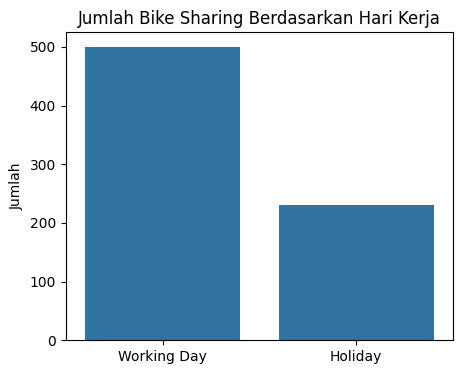

In [42]:
plt.figure(figsize=(5, 4))
sns.barplot(
    data=df_workingday.sort_values('workingday', ascending=False),
    x='workingday',
    y='sum',
)

plt.title('Jumlah Bike Sharing Berdasarkan Hari Kerja')
plt.xlabel(None)
plt.ylabel('Jumlah')
plt.show()


# 4.4 Pengrauh cuaca terhadap penggunaan layanan Bike Sharing

In [25]:
df_weathersit = df_day.groupby('weathersit').instant.nunique().reset_index()
df_weathersit.rename(columns={'instant': 'sum'}, inplace=True)
df_weathersit


,weathersit,sum
0,1,463
1,2,247
2,3,21


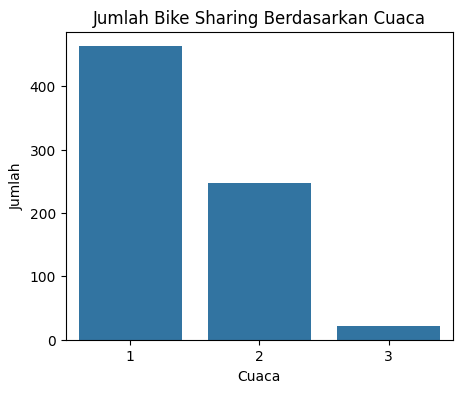

In [26]:
plt.figure(figsize=(5, 4))
sns.barplot(
    data=df_weathersit.sort_values('weathersit', ascending=False),
    x='weathersit',
    y='sum',
)

plt.title('Jumlah Bike Sharing Berdasarkan Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah')
plt.show()

5. Kesimpulan

Berdasarkan pengamatan pada DataFrame df_season pada kolom season dan sum, terlihat bahwa jumlah penggunaan bike sharing tertinggi terjadi pada musim gugur (fall). Hal ini menunjukkan bahwa musim gugur memiliki pengaruh yang kuat terhadap penggunaan bike sharing.
Dari analisis DataFrame df_yr pada kolom yr dan sum, ditemukan bahwa tren penggunaan bike sharing paling tinggi terjadi pada tahun 2012. Dengan demikian, dapat disimpulkan bahwa tren penggunaan bike sharing paling tinggi terjadi pada tahun 2012.
Hasil pengamatan pada DataFrame df_day pada kolom mnth dan cnt menunjukkan bahwa, bulan dengan jumlah penggunaan bike sharing terbanyak adalah bulan Juni. Oleh karena itu, dapat disimpulkan bahwa bulan Juni memiliki tren penggunaan bike sharing yang tinggi.
Dalam analisis pada DataFrame df_hour pada kolom hour dan cnt, terlihat bahwa jam dengan jumlah penggunaan bike sharing terbanyak adalah jam 17 atau jam 5 sore. Oleh karena itu, dapat disimpulkan bahwa jam 17 atau jam 5 sore memiliki tren penggunaan bike sharing yang tinggi.
Melalui pengamatan pada DataFrame df_holiday pada kolom holiday dan sum, dapat dilihat bahwa jumlah penggunaan bike sharing lebih tinggi pada hari biasa atau bukan hari libur. Dengan demikian, dapat disimpulkan bahwa adanya hari libur tidak terlalu berpengaruh terhadap penggunaan bike sharing.
Hasil pengamatan pada DataFrame df_working pada kolom workingday dan sum menunjukkan bahwa, jumlah penggunaan bike sharing lebih tinggi pada hari kerja. Oleh karena itu, dapat disimpulkan bahwa hari kerja berpengaruh terhadap penggunaan bike sharing.

In [28]:
data_clean = 'data.csv'
df_day.to_csv(data_clean, index=False)

In [29]:
files.download(data_clean)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>